# 线性回归

#### 最小二乘法

$$\tilde{w}=(X^{T}X)^{-1}X^{T}y$$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

#### AT（温度），V（压力），AP（湿度），RH（压强），PE（输出电力）

In [3]:
data = pd.read_excel('./CCPP/Folds5x2_pp.xlsx')
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
data.shape

(9568, 5)

In [5]:
X = data[['AT', 'V', 'AP', 'RH']]

X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [6]:
y = data[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [9]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.intercept_)
print(linreg.coef_)

[ 460.05727267]
[[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


In [10]:
from sklearn import metrics

y_pred = linreg.predict(X_test)

print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  20.8371915472
RMSE:  4.56477727247


In [20]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)

# 模型拟合测试集
y_pred = linreg.predict(X_test)

# 用scikit-learn计算MSE
print("MSE: ",metrics.mean_squared_error(y_test, y_pred))

# 用scikit-learn计算RMSE
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE:  23.9056537995
RMSE:  4.88934083487


In [21]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]

from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

# 用scikit-learn计算MSE
print("MSE: ",metrics.mean_squared_error(y, predicted))

# 用scikit-learn计算RMSE
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, predicted)))

MSE:  20.7936725099
RMSE:  4.56000795064


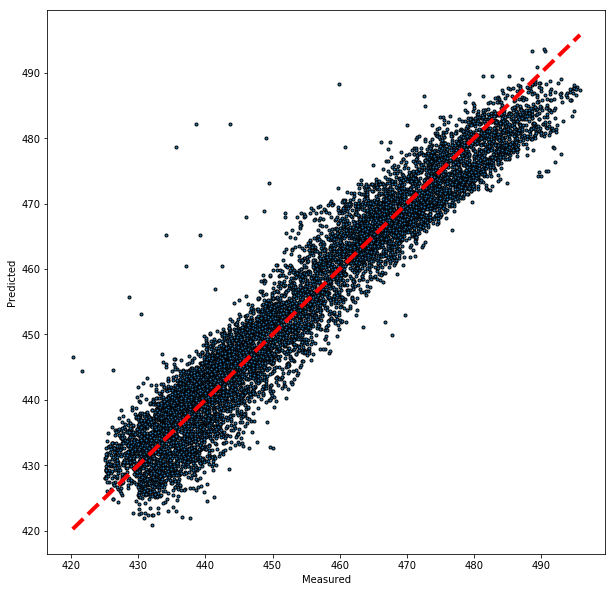

In [24]:
fig, ax = plt.subplots(figsize = [10, 10])
ax.scatter(y, predicted, marker='.', edgecolors='k')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()